In [ ]:
'''
                                                Final Project - IMDB and Netflix
                                                
                                                                By
                                                    Avital Haiman - 205515513
                                                    Roni Eliasi   - 208209924
                                                    Eden Ohana    - 318437431
                                                    Shir Marom    - 316603547
'''

In [1]:
''' 
    STEP 0:
    Importing relevant Python libraries
'''
import csv
import pandas as pd
import json
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.tokenize import word_tokenize
from sklearn.feature_selection import RFE
from sklearn.base import clone
import random
from sklearn.metrics import mean_absolute_error
import sklearn.linear_model as sklm
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

random.seed(20)

In [2]:
'''
    STEP 1.2:
    The Target Variable
'''
df = pd.read_csv('main_data.csv')#read the data

r= df['averageRating']
r.describe()#statistics

count    1765.000000
mean        6.268612
std         1.139256
min         1.500000
25%         5.600000
50%         6.400000
75%         7.100000
max         9.200000
Name: averageRating, dtype: float64

In [3]:
''' 
    STEP 2.1:
    Collect the data
'''

#####Shir

' \n    STEP 2.1:\n    Collect the data\n'

In [ ]:
''' 
    STEP 2.2:
    Data Consolidation
'''

#####Shir

In [5]:
''' 
    STEP 2.3:
    Processing the data
'''
# Loading the data
main_data = pd.read_csv('main_data.csv')
main_data.dtypes

#dummy variables

#Checking numeric variable distribution
pd.DataFrame.describe(main_data)

#Genres dummies
main_data['genres_array'] = main_data['genres'].str.strip()
main_data['genres_array'] = main_data['genres'].str.split(",")
main_data['genres_array']

genres_dummies = pd.get_dummies(main_data['genres_array'].apply(pd.Series).stack()).sum(level=0)
main_data = pd.concat([main_data, genres_dummies], axis=1)

#Country Of Origin dummies
main_data['countryOfOrigin_array'] = main_data['countryOfOrigin'].str.strip()
main_data['countryOfOrigin_array'] = main_data['countryOfOrigin_array'].str.split(",")


country_dummies = pd.get_dummies(main_data['countryOfOrigin_array'].apply(pd.Series).stack()).sum(level=0)
main_data = pd.concat([main_data, country_dummies], axis=1)

letterRating_dummies = pd.get_dummies(main_data['letterRating'].apply(pd.Series).stack()).sum(level=0)
main_data = pd.concat([main_data, letterRating_dummies], axis=1)

main_data.to_csv("main_data.csv")  

main_data

,Unnamed: 0,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,differentTitles,cast,...,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,UR
0,0,tt0018328,The Ring,1927,116,"Drama,Romance,Sport",6.2,3192,9,"Naomi Watts, Martin Henderson, David Dorfman, ...",...,0,1,0,0,0,0,0,0,0,0
1,1,tt0031411,Heimatland,1939,73,"Musical,Romance",6.7,6,5,"Parambrata Chatterjee, Ani Hovhannisyan, Jonat...",...,0,0,0,0,0,0,1,0,0,0
2,2,tt0031829,Pukar,1939,165,"Drama,History",6.9,65,2,"Anil Kapoor, Madhuri Dixit, Namrata Shirodkar,...",...,0,0,0,1,0,0,0,0,0,0
3,3,tt0034498,The Battle of Midway,1942,18,"Documentary,Short,War",6.1,1892,9,"Henry Fonda, Jane Darwell",...,0,0,0,1,0,0,0,0,0,0
4,4,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,79389,9,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,1760,tt9837502,Merry Men: The Real Yoruba Demons,2018,106,"Action,Comedy",5.0,105,3,"Ramsey Nouah, Jim Iyke, Ayo Makun, Falz, Richa...",...,0,0,0,0,0,1,0,0,0,0
1761,1761,tt9860728,Falling Inn Love,2019,98,"Comedy,Romance",5.6,16229,9,"Christina Milian, Adam Demos, Jeffrey Bowyer-C...",...,0,0,0,0,0,0,1,0,0,0
1762,1762,tt9861498,Edoardo Ferrario: Temi Caldi,2019,65,Comedy,6.9,97,1,Edoardo Ferrario,...,0,0,0,0,0,1,0,0,0,0
1763,1763,tt9887580,Bulletproof 2,2020,97,"Action,Comedy",3.6,453,9,"Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi,...",...,0,0,0,0,0,1,0,0,0,0


In [6]:
'''
    STEP 3.1:
    Statistics
'''

df = pd.read_csv('main_data.csv')#read the data

#correlation matrix
corrMatrix = df.corr()
corrMatrix.to_csv("corr_matrix.csv")

corrMatrix

,Unnamed: 0,Unnamed: 0.1,startYear,runtimeMinutes,averageRating,numVotes,differentTitles,Action,Adventure,Animation,...,PG.1,PG-13.1,R.1,TV-14.1,TV-G.1,TV-MA.1,TV-PG.1,TV-Y.1,TV-Y7.1,UR.1
Unnamed: 0,1.000000,1.000000,0.625944,-0.199624,-0.176870,-0.315336,-0.230801,-0.134596,-0.139450,-0.026388,...,-0.118562,-0.236571,-0.201236,0.073098,0.038161,0.294342,0.094552,-0.004418,0.025730,-0.046373
Unnamed: 0.1,1.000000,1.000000,0.625944,-0.199624,-0.176870,-0.315336,-0.230801,-0.134596,-0.139450,-0.026388,...,-0.118562,-0.236571,-0.201236,0.073098,0.038161,0.294342,0.094552,-0.004418,0.025730,-0.046373
startYear,0.625944,0.625944,1.000000,-0.182271,-0.189199,-0.216009,-0.127474,-0.074044,-0.077453,0.019524,...,-0.117482,-0.128552,-0.105220,0.001350,0.019033,0.246562,0.040696,0.062159,0.010743,-0.069227
runtimeMinutes,-0.199624,-0.199624,-0.182271,1.000000,0.207407,0.333681,0.281659,0.194750,0.022947,-0.225382,...,-0.006147,0.142826,0.184259,0.093429,-0.102056,-0.161308,-0.100565,-0.233909,-0.134818,0.012782
averageRating,-0.176870,-0.176870,-0.189199,0.207407,1.000000,0.322308,0.040190,-0.102892,-0.047917,-0.028884,...,-0.066376,0.052005,0.106345,-0.062776,-0.019416,-0.054974,0.029086,-0.021730,-0.072776,-0.021251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TV-MA.1,0.294342,0.294342,0.246562,-0.161308,-0.054974,-0.216051,-0.208556,-0.084554,-0.169006,-0.151044,...,-0.174768,-0.250077,-0.363374,-0.293642,-0.091986,1.000000,-0.184144,-0.067845,-0.063693,-0.023171
TV-PG.1,0.094552,0.094552,0.040696,-0.100565,0.029086,-0.085908,-0.169510,-0.077194,0.009659,0.022881,...,-0.067998,-0.097298,-0.141379,-0.114248,-0.035789,-0.184144,1.000000,-0.026397,-0.024781,-0.009015
TV-Y.1,-0.004418,-0.004418,0.062159,-0.233909,-0.021730,-0.034205,-0.022283,-0.018024,0.073213,0.433102,...,-0.025053,-0.035848,-0.052089,-0.042093,-0.013186,-0.067845,-0.026397,1.000000,-0.009130,-0.003322
TV-Y7.1,0.025730,0.025730,0.010743,-0.134818,-0.072776,-0.031491,-0.017114,0.018302,0.101664,0.406596,...,-0.023519,-0.033654,-0.048901,-0.039517,-0.012379,-0.063693,-0.024781,-0.009130,1.000000,-0.003118


In [8]:
'''
    STEP 4.1:
    Netflix description proccesing- common words algorithm
'''

#####Avital- run on your computer

# Loading the data
main_data = pd.read_csv('imdb_and_netflix_all1.csv')

#Checking numeric variable distribution
pd.DataFrame.describe(main_data)

#Genres dummies
main_data['genres_array'] = main_data['genres'].str.strip()
main_data['genres_array'] = main_data['genres'].str.split(",")
main_data['genres_array']

genres_dummies = pd.get_dummies(main_data['genres_array'].apply(pd.Series).stack()).sum(level=0)
main_data = pd.concat([main_data, genres_dummies], axis=1)

#Genres dummies
main_data['genres_array'] = main_data['genres'].str.strip()
main_data['genres_array'] = main_data['genres'].str.split(",")
main_data['genres_array']

genres_dummies = pd.get_dummies(main_data['genres_array'].apply(pd.Series).stack()).sum(level=0)
main_data = pd.concat([main_data, genres_dummies], axis=1)

#Country Of Origin dummies
main_data['countryOfOrigin_array'] = main_data['countryOfOrigin'].str.strip()
main_data['countryOfOrigin_array'] = main_data['countryOfOrigin_array'].str.split(",")

country_dummies = pd.get_dummies(main_data['countryOfOrigin_array'].apply(pd.Series).stack()).sum(level=0)
main_data = pd.concat([main_data, country_dummies], axis=1)

letterRating_dummies = pd.get_dummies(main_data['letterRating'].apply(pd.Series).stack()).sum(level=0)
main_data = pd.concat([main_data, letterRating_dummies], axis=1)

main_data.to_csv('main_data.csv',index=True)

main_data

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,differentTitles,cast,countryOfOrigin,...,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,UR
0,tt0018328,The Ring,1927,116,"Drama,Romance,Sport",6.2,3192,9,"Naomi Watts, Martin Henderson, David Dorfman, ...",United States,...,0,1,0,0,0,0,0,0,0,0
1,tt0031411,Heimatland,1939,73,"Musical,Romance",6.7,6,5,"Parambrata Chatterjee, Ani Hovhannisyan, Jonat...",Germany,...,0,0,0,0,0,0,1,0,0,0
2,tt0031829,Pukar,1939,165,"Drama,History",6.9,65,2,"Anil Kapoor, Madhuri Dixit, Namrata Shirodkar,...",India,...,0,0,0,1,0,0,0,0,0,0
3,tt0034498,The Battle of Midway,1942,18,"Documentary,Short,War",6.1,1892,9,"Henry Fonda, Jane Darwell",United States,...,0,0,0,1,0,0,0,0,0,0
4,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,79389,9,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",United States,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,tt9837502,Merry Men: The Real Yoruba Demons,2018,106,"Action,Comedy",5.0,105,3,"Ramsey Nouah, Jim Iyke, Ayo Makun, Falz, Richa...",Nigeria,...,0,0,0,0,0,1,0,0,0,0
1761,tt9860728,Falling Inn Love,2019,98,"Comedy,Romance",5.6,16229,9,"Christina Milian, Adam Demos, Jeffrey Bowyer-C...",United States,...,0,0,0,0,0,0,1,0,0,0
1762,tt9861498,Edoardo Ferrario: Temi Caldi,2019,65,Comedy,6.9,97,1,Edoardo Ferrario,Italy,...,0,0,0,0,0,1,0,0,0,0
1763,tt9887580,Bulletproof 2,2020,97,"Action,Comedy",3.6,453,9,"Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi,...",United States,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Loading the data
main_data = pd.read_csv('main_data.csv')
main_data =  main_data.iloc[: , 1:]

#Removing stop words
stop_words = stopwords.words('english')

#Cleaning the strings
main_data['netflixDescriptionToArray'] =  main_data['netflixDescription'].str.lower()
main_data['netflixDescriptionToArray'] =  main_data['netflixDescriptionToArray'].str.split()
main_data['netflixDescriptionToArray'] = main_data['netflixDescriptionToArray'].apply(lambda x: [item for item in x if item not in stop_words])
main_data['netflixDescriptionToArray'] = main_data['netflixDescriptionToArray'].apply(lambda x: [re.sub('[!^.,@#%"–/-`$''?]', '', word) for word in x ])
main_data['netflixDescriptionToArray'] = main_data['netflixDescriptionToArray'].apply(lambda x: [word for word in x if word != '' ])

#Find the most common words - 1000
counts = dict()
clean_word = ''

for index, row in main_data.iterrows():
    for word in row['netflixDescriptionToArray']:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1


words_sorted_by_count = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

top1000words = {k: words_sorted_by_count[k] for k in list(words_sorted_by_count)[:1000]}
top1000wordsToColumns = list(top1000words.keys())

#Creating a new database of the 1000 most common words and rating
db_mostCommonWords = pd.DataFrame(columns=['tconst', 'rating','netflixDescription'], data=main_data[['tconst', 'averageRating','netflixDescriptionToArray']].values)
for word in top1000wordsToColumns:
    db_mostCommonWords[word]=0

for index, row in db_mostCommonWords.iterrows():
    for word in row['netflixDescription']:
        if word in top1000wordsToColumns:
            db_mostCommonWords.at[index, word] = 1
            
db_mostCommonWords.to_csv('mostCommonWords.csv',index=True)

def imp_df(column_names, importances):
    data = {
        'Feature': column_names,
        'Importance': importances,
    }
    df = pd.DataFrame(data) \
        .set_index('Feature') \
        .sort_values('Importance', ascending=False)

    return df
 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df



features_loc = []
features = []
loc = 0

X = db_mostCommonWords.drop(['tconst','netflixDescription', 'rating'],axis=1)
y = db_mostCommonWords['rating'].astype('double')

model = LinearRegression()
most_important_words_1 = drop_col_feat_imp(model, X, y)
most_important_words_1 = most_important_words_1.head(20).index.tolist()

# Feature extraction
model2 = LinearRegression()
rfe = RFE(model2, 20)
fit = rfe.fit(X, y)

participating_features = fit.support_

for i in range(len(participating_features)):
    if participating_features[i]:
        features_loc.append(i)

for column in X:
    if loc in features_loc:
        features.append(column)
    loc+=1
    
    
#Chosing the top 20 most affective words
db_20mostCommonWords = pd.DataFrame(columns=main_data.columns, data=main_data.values)

for word in most_important_words_1:
    db_20mostCommonWords[word]=0

for index, row in db_20mostCommonWords.iterrows():
    for word in row['netflixDescriptionToArray']:
        if word in db_20mostCommonWords:
            db_20mostCommonWords.at[index, word] = 1

db_20mostCommonWords.to_csv('most20CommonWords.csv',index=True)

In [11]:
'''
    STEP 4.1:
    Netflix description proccesing- Sentiment Anlysis
'''

nltk.download('vader_lexicon')
# Loading the data
main_data = pd.read_csv('main_data.csv',encoding= 'unicode_escape')

#Removing stop words
main_data['netflixDescriptionForSentimentAnalysis'] =  main_data['netflixDescription'].str.lower()
stop_words = set(stopwords.words("english"))
nltk.download('stopwords')
main_data['netflixDescriptionForSentimentAnalysis'] = main_data['netflixDescriptionForSentimentAnalysis'].str.split()
main_data['netflixDescriptionForSentimentAnalysis'] = main_data['netflixDescriptionForSentimentAnalysis'].apply(lambda x: [item for item in x if item not in stop_words])
main_data['netflixDescriptionForSentimentAnalysis'] = main_data['netflixDescriptionForSentimentAnalysis'].apply(lambda x: [re.sub('[!^.,@#%"–/-`$''?]', '', word) for word in x ])
main_data['netflixDescriptionForSentimentAnalysis'] = main_data['netflixDescriptionForSentimentAnalysis'].apply(lambda x: [word for word in x if word != '' ])
main_data['netflixDescriptionForSentimentAnalysis'] = main_data['netflixDescriptionForSentimentAnalysis'].map(lambda x: ' '.join(x))

#Creating a sentiment score function
def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
     sid_obj = SentimentIntensityAnalyzer()
  
    # polarity_scores method of SentimentIntensityAnalyzer
    # oject gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
     sentiment_dict = sid_obj.polarity_scores(sentence)
        
     # decide sentiment as positive, negative and neutral
     if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
   
     elif sentiment_dict['compound'] <= - 0.05 :
         return "Negative"
  
     else :
         return "Neutral"
        
#Running the function      
main_data['netflixDescriptionForSentimentAnalysis'] = main_data['netflixDescriptionForSentimentAnalysis'].map(sentiment_scores)

#main_data['netflixDescriptionForSentimentAnalysis']

#Export to csv
df = pd.read_csv("main_data.csv", encoding= 'unicode_escape')
df["sentimentAnalysis"] = main_data['netflixDescriptionForSentimentAnalysis']
df.to_csv("new_main_data.csv", index=True)

new_main_data = pd.read_csv('new_main_data.csv',encoding= 'unicode_escape')

#Creating dummies to the sentiment analysis
def dummiess_positive(word):
    if word == "Positive": 
        return 1
    else :
        return 0

def dummiess_negative(word):
    if word == "Negative": 
        return 1
    else :
        return 0
    
def dummiess_neutral(word):
    if word == "Neutral": 
        return 1
    else :
        return 0
#Running the dummies function 
new_main_data['positiveSentiment'] = new_main_data["sentimentAnalysis"].map(dummiess_positive)
new_main_data['negativeSentiment'] = new_main_data["sentimentAnalysis"].map(dummiess_negative)
new_main_data['neutralSentiment'] = new_main_data["sentimentAnalysis"].map(dummiess_neutral)

#Export to cvs
df = pd.read_csv("new_main_data.csv", encoding= 'unicode_escape')
df["positiveSentiment"] = new_main_data['positiveSentiment']
df["negativeSentiment"] = new_main_data['negativeSentiment']
df["neutralSentiment"] = new_main_data['neutralSentiment']
df.to_csv("new_main_data.csv", index=True)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\רוני\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\רוני\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
new_main_data["sentimentAnalysis"]

0       Negative
1       Positive
2       Negative
3       Negative
4       Positive
          ...   
1760    Positive
1761    Positive
1762    Positive
1763    Positive
1764    Negative
Name: sentimentAnalysis, Length: 1765, dtype: object

In [ ]:
'''
    STEP 4.2:
    Cast proccesing
'''
#####Shir

In [ ]:
'''
    STEP 4.3:
    Director proccesing
'''
#####Shir

In [51]:
''' 
    STEP 5:
    Executing Different models:
        1 - Linear Regression.
        2 - Desicion Tree Regressor.
        3 - Random Forest Regressor.
        4 - Gradient Boosting Regressor.
        5 - k-nearest Neighbors Regressor.
'''

df = pd.read_csv('updated_rating_actors_directors.csv')#read the data

# the columns we filtered from the data (see documentation)
merge=['originalTitle','genres','numVotes','cast','countryOfOrigin','netflixDescription','letterRating','genres_array',
 'countryOfOrigin_array','tconst','sentimentAnalysis','netflixDescriptionToArray']
X = df.drop([var for var in df.columns if var in merge],axis='columns')#drop from the data everything that is not in merge

#Run diffrent options
'''1- MAE for basic data'''
# drop=['directorRating','actorsRating', 'positiveSentiment', 'negativeSentiment', 'neutralSentiment',
#      'things','keep','american','terrorist','performs','soon','history','tale','hot','media','connection','documentary',
#       'love','living','meeting','corrupt','novelist','searches','set','scientist']

'''2- MAE with description (common words)'''
#drop=['directorRating','actorsRating', 'positiveSentiment', 'negativeSentiment', 'neutralSentiment']

'''3- MAE with description (sentiment analysis)'''
#drop=['directorRating','actorsRating']

'''4- MAE with actors rating'''
#drop=['directorRating']

'''5- MAE with all data enrichments final data'''
#no drop

# X = X.drop([var for var in df.columns if var in drop],axis='columns')

X

,startYear,runtimeMinutes,averageRating,differentTitles,Action,Adventure,Animation,Biography,Comedy,Crime,...,performs,terrorist,american,keep,things,directorRating,actorsRating,positiveSentiment,negativeSentiment,neutralSentiment
0,1942,18,6.1,9,0,0,0,0,0,0,...,0,0,0,0,0,5.435922,6.637143,0,1,0
1,2001,118,6.4,9,0,0,0,0,1,0,...,0,0,0,0,0,6.760000,7.178261,1,0,0
2,1945,32,6.6,9,0,0,0,0,0,0,...,0,0,0,0,0,6.850000,6.745833,0,1,0
3,1980,58,7.4,9,0,0,0,0,0,0,...,0,0,0,0,0,6.770455,6.694792,0,1,0
4,1950,98,6.2,9,0,0,0,0,0,0,...,0,0,0,0,0,6.420690,6.291667,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2018,106,5.0,3,1,0,0,0,1,0,...,0,0,0,0,0,5.000000,6.633333,1,0,0
1496,2019,98,5.6,9,0,0,0,0,1,0,...,0,0,0,0,0,7.552055,7.793750,1,0,0
1497,2019,65,6.9,1,0,0,0,0,1,0,...,0,0,0,0,0,6.900000,7.400000,1,0,0
1498,2020,97,3.6,9,1,0,0,0,1,0,...,0,0,0,0,0,5.325000,6.450000,1,0,0


In [52]:
'''
    STEP 6.1:
    Validation
'''
##split the data to test and train
X= X.sort_values('startYear') #sort the rows by start year

X['startYear'].describe()

X['number'] = np.arange(len(X))
X_train= X[X["number"] <= 1050] #70% of the earliast years
X_test= X[X["number"] > 1050] #30%

del X_train['number']
del X_test['number']

y_train= X_train['averageRating'] #the target column
y_test= X_test['averageRating']

del X_train['averageRating']#drop the target column
del X_test['averageRating']

y_test

753     4.5
862     6.5
874     5.8
833     5.9
830     7.4
       ... 
496     5.8
492     6.5
1499    5.1
512     6.6
440     6.2
Name: averageRating, Length: 449, dtype: float64

In [53]:
'''
    STEP 6.2:
    Baseline
'''

print(y_train.mean()) #6.3683

y_train_base = pd.DataFrame(6.3683, index=np.arange(len(y_train)), columns=['baseline'])
y_test_base = pd.DataFrame(6.3683, index=np.arange(len(y_test)), columns=['baseline'])

MAE_train=mean_absolute_error(y_train, y_train_base)
MAE_test=mean_absolute_error(y_test, y_test_base)

print('Baseline: MAE Train = ', MAE_train)
print('Baseline: MAE Test = ', MAE_test)

6.368315889628931
Baseline: MAE Train =  0.8550596574690772
Baseline: MAE Test =  0.9438496659242762


In [ ]:
'''
    STEP 6.3:
    Run the models
'''

In [54]:
'''
    MODEL 1:
    Linear Regression.
'''
reg = sklm.LinearRegression()
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MAE_train=mean_absolute_error(y_train, y_train_pred)
MAE_test=mean_absolute_error(y_test, y_test_pred)

print('Linear Regression: MAE Train. = ', MAE_train)
print('Linear Regression: MAE Test = ', MAE_test)

Linear Regression: MAE Train. =  0.4982880291997762
Linear Regression: MAE Test =  32232689.91762021


In [55]:
'''
    MODEL 2:
    Desicion Tree Regressor.
'''
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

MAE_train=mean_absolute_error(y_train, y_train_pred)
MAE_test=mean_absolute_error(y_test, y_test_pred)

print('Desicion Tree: MAE Train. = ', MAE_train)
print('Desicion Tree: MAE Test = ', MAE_test)

Desicion Tree: MAE Train. =  0.4982880291997762
Desicion Tree: MAE Test =  0.8213808463251671


In [56]:
'''
    MODEL 4:
    Gradient Boosting Regressor.
'''
clf = GradientBoostingRegressor(max_depth=500,n_estimators=300,min_samples_split=20,min_impurity_decrease=1e-09)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

MAE_train=mean_absolute_error(y_train, y_train_pred)
MAE_test=mean_absolute_error(y_test, y_test_pred)

print('Gradient Boosting: MAE Train. = ', MAE_train)
print('Gradient Boosting: MAE Test = ', MAE_test)

Gradient Boosting: MAE Train. =  0.4982880291997762
Gradient Boosting: MAE Test =  0.637834932031678


In [57]:
'''
    MODEL 5:
    k-nearest Neighbors Regressor.
'''
classifier = KNeighborsRegressor(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

MAE_train=mean_absolute_error(y_train, y_train_pred)
MAE_test=mean_absolute_error(y_test, y_test_pred)

print('KNN: MAE Train. = ', MAE_train)
print('KNN: MAE Test = ', MAE_test)

KNN: MAE Train. =  0.4982880291997762
KNN: MAE Test =  0.7652115812917596


In [58]:
'''
    MODEL 3:
    Random Forest Regressor- The Selected Model.
'''
forest = RandomForestRegressor (max_depth=500,n_estimators=300,min_samples_split=20,min_impurity_decrease=1e-09)
forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

MAE_train=mean_absolute_error(y_train, y_train_pred)
MAE_test=mean_absolute_error(y_test, y_test_pred)

print('Random Forest: MAE Train. = ', MAE_train)
print('Random Forest: MAE Test = ', MAE_test)

Random Forest: MAE Train. =  0.4982880291997762
Random Forest: MAE Test =  0.6170593786616667


In [59]:
'''
    STEP 6.4:
    Feature Selection
'''
sel = SelectFromModel(RandomForestRegressor (max_depth=500,n_estimators=300,min_samples_split=20,min_impurity_decrease=1e-09))
sel.fit(X_train, y_train)
sel.get_support()

selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)#the selected features

#run random forest with feature selection
selected= ['startYear', 'runtimeMinutes', 'differentTitles', 'Action', 'Biography',
       'Comedy', 'Documentary', 'Drama', 'Family', ' Australia', 'PG', 'R',
       'searches', 'directorRating', 'actorsRating']

X_train_selected= X_train.drop([var for var in X_train.columns if var not in selected],axis='columns')
X_test_selected= X_test.drop([var for var in X_test.columns if var not in selected],axis='columns')

forest_selected = RandomForestRegressor (max_depth=500,n_estimators=300,min_samples_split=20,min_impurity_decrease=1e-09)
forest_selected.fit(X_train_selected, y_train)

y_pred_train = forest_selected.predict(X_train_selected)
y_test_pred = forest_selected.predict(X_test_selected)

MAE_train=mean_absolute_error(y_train, y_train_pred)
MAE_test=mean_absolute_error(y_test, y_test_pred)

print('Random Forest with feature selection: MAE Train. = ', MAE_train)
print('Random Forest with feature selection: MAE Test = ', MAE_test)

Index(['startYear', 'runtimeMinutes', 'differentTitles', 'Action', 'Biography',
       'Comedy', 'Documentary', 'Drama', 'Family', 'PG', 'R', 'searches',
       'directorRating', 'actorsRating'],
      dtype='object')
Random Forest with feature selection: MAE Train. =  0.4982880291997762
Random Forest with feature selection: MAE Test =  0.6235337459095686


In [ ]:
'''
    STEP 7 - 
    Choosing the best model (according to MAE score)
    The selected model is Random Forest with MAE of 
'''

In [61]:
'''
    STEP 7:
    Gris Search
'''
forest.get_params()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [62]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [63]:
###Grid Search with Cross Validation

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [6, 5, 7],
    'n_estimators': [500, 800, 1000, 1100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  8.9min finished


{'bootstrap': True,
 'max_depth': 90,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1100}

In [64]:
#run random forest with grid search
forest_with_grid = RandomForestRegressor (max_depth=90,n_estimators=500,min_samples_split=5,min_impurity_decrease=1e-09)
forest_with_grid.fit(X_train, y_train)

y_pred_train = forest_with_grid .predict(X_train)
y_test_pred = forest_with_grid .predict(X_test)

MAE_train=mean_absolute_error(y_train, y_train_pred)
MAE_test=mean_absolute_error(y_test, y_test_pred)

print('MAE Train. = ', MAE_train)
print('MAE Test = ', MAE_test)

MAE Train. =  0.4982880291997762
MAE Test =  0.6088791118680879


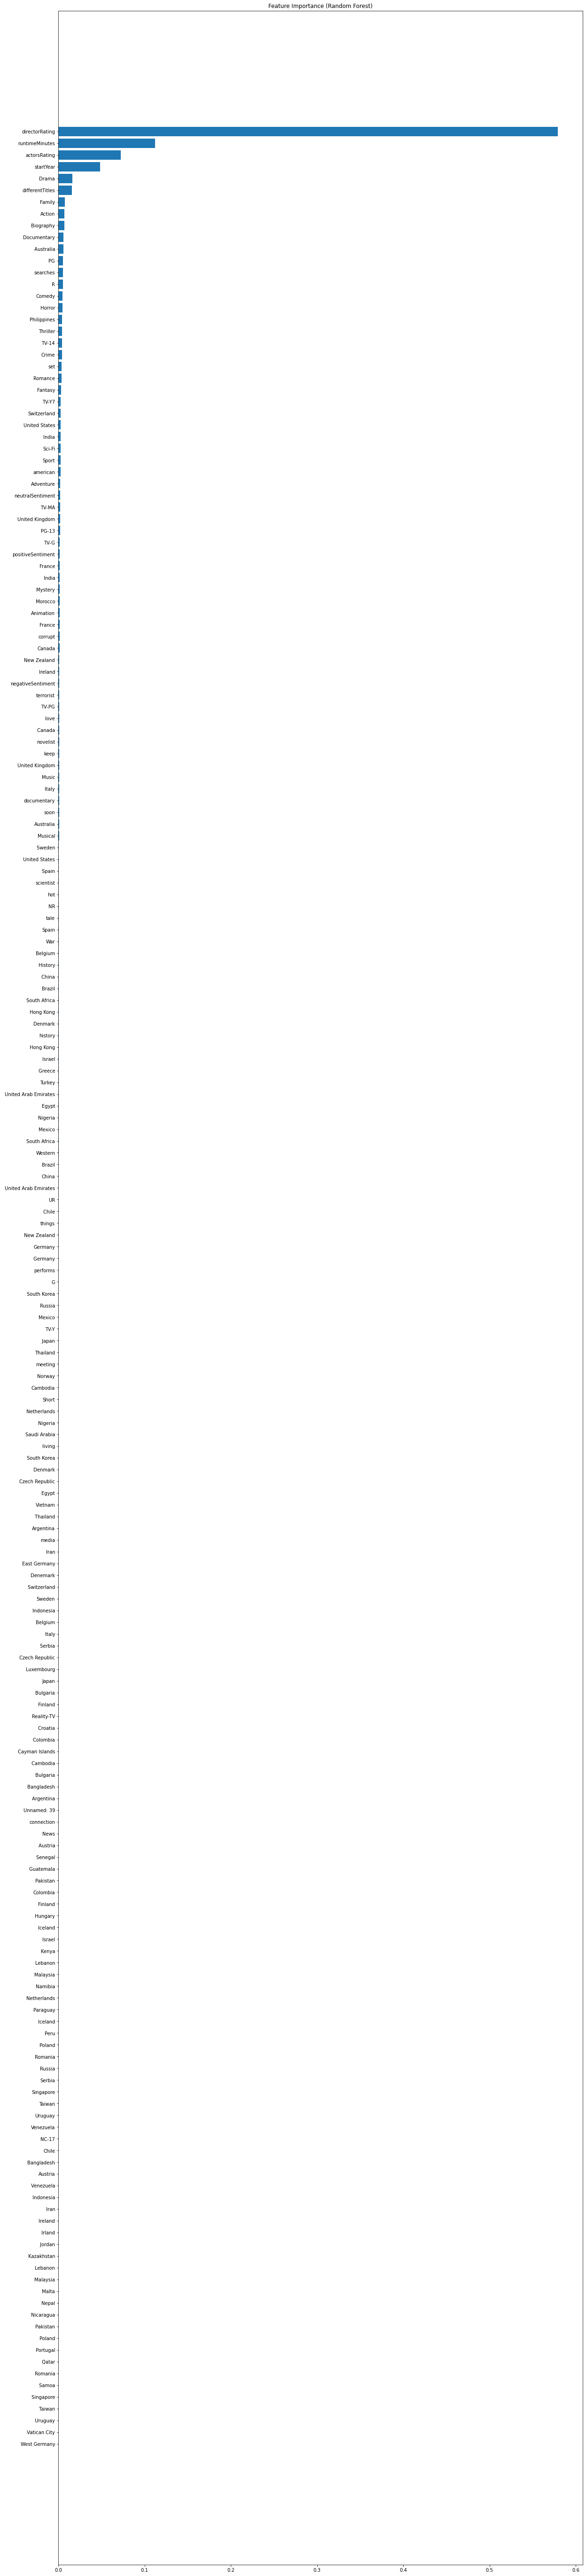

In [65]:
##Feature Importance graph##
feature_importance = forest.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(20, 100))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance (Random Forest)')
plt.savefig('featureimp.png')